In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [2]:
domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
metric = "AUPRC"

dir_path = '../results/Baseline/PACS/PReNet'
dir_path = '../results/Baseline/PACS/DeepSAD'

In [3]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [4]:
ans = []
para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "batch_size", "cnt",]

print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    record = []
    args = data["args"].item()
    result = data["result"].item()
    for para in para_name_list:
        record.append(args[para])

    for key in ["val"] + domain_list:
        record.append(result[key]["AUC"])
    
    for key in ["val"] + domain_list:
        record.append(result[key]["AP"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list +\
             [f'{item}_AUROC' for item in ["val"] + domain_list] + \
                [f'{item}_AUPRC' for item in ["val"] + domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)
ans["AUROC_mean"] = ans[["art_painting_AUROC","cartoon_AUROC","photo_AUROC","sketch_AUROC"]].mean(axis = 1)
ans["AUPRC_mean"] = ans[["art_painting_AUPRC","cartoon_AUPRC","photo_AUPRC","sketch_AUPRC"]].mean(axis = 1)
# ans["val_AUROC_mean"] = ans[["val_art_painting_AUROC","val_cartoon_AUROC","val_photo_AUROC","val_sketch_AUROC"]].mean(axis = 1)
# ans["val_AUPRC_mean"] = ans[["val_art_painting_AUPRC","val_cartoon_AUPRC","val_photo_AUPRC","val_sketch_AUPRC"]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

1260


,normal_class,anomaly_class,lr,epochs,batch_size,cnt,val_AUROC,photo_AUROC,art_painting_AUROC,cartoon_AUROC,sketch_AUROC,val_AUPRC,photo_AUPRC,art_painting_AUPRC,cartoon_AUPRC,sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean
0,2,0 1 3 4 5 6,0.00005,60,64,1,0.964530,0.990741,0.994152,0.821256,0.747778,0.810286,0.948413,0.948413,0.591817,0.387906,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.888482,0.719137
1,5,0 1 2 3 4 6,0.00005,60,64,4,0.997182,1.000000,1.000000,0.994152,0.854167,0.978533,1.000000,1.000000,0.958333,0.829657,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.962080,0.946998
2,2,0 1 3 4 5 6,0.00050,40,64,4,0.967094,0.986111,0.994152,0.896135,0.744444,0.829067,0.915079,0.948413,0.633565,0.329468,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.905211,0.706631
3,3,0 1 2 4 5 6,0.00050,20,128,4,1.000000,1.000000,1.000000,1.000000,0.976584,1.000000,1.000000,1.000000,1.000000,0.668849,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.994146,0.917212
4,2,0 1 3 4 5 6,0.00050,60,128,3,0.967521,0.990741,0.994152,0.869565,0.743333,0.829753,0.948413,0.948413,0.612147,0.327997,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.899448,0.709242


In [5]:
ans["normal_class"].value_counts()

2    180
5    180
3    180
1    180
4    180
6    180
0    180
Name: normal_class, dtype: int64

In [6]:
ans.cnt.value_counts()

1    252
4    252
3    252
2    252
0    252
Name: cnt, dtype: int64

In [7]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [8]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [9]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [10]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("AUPRC_mean")
# columns_to_drop = columns_to_drop + [f"photo_{metric}",f"art_painting_{metric}",f"cartoon_{metric}",f"sketch_{metric}",f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['val_AUROC',
 'photo_AUROC',
 'art_painting_AUROC',
 'cartoon_AUROC',
 'sketch_AUROC']

In [11]:
agg_method = {"cnt":["count"],
              f"val_AUPRC":["mean","std"],
              f"photo_{metric}":["mean", "std"],
              f"art_painting_{metric}":["mean", "std"],
              f"cartoon_{metric}":["mean", "std"],
              f"sketch_{metric}":["mean", "std"],
              f"{metric}_mean":["mean", "std"],
              f"AUROC_mean":["mean", "std"],
              f"AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
    selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
    # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
    group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
    group_key.sort()
    # print(group_key)
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}", "mean"), ascending=False)
    selected_para = selected_records_anslysis.index[0]
    # print(selected_para)
    selected_records_anslysis

    filter = None
    for idx, item in enumerate(group_key):
        if filter is None:
            filter = selected_records[item] == selected_para[idx]
        else:
            filter = filter & (selected_records[item] == selected_para[idx])
    temp = selected_records[filter].agg(["mean", "std"]).T
    temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
    for key in [f'{item}_{metric}' for item in domain_list]:
        print(temp.loc[key]["res"])
    print(f'{round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["std"] * 100, 2)})')
    selected_records[filter]

100.0(0.0)
60.37(0.0)
44.53(0.0)
29.25(0.0)
58.54(0.0)
100.0(0.0)
94.44(0.0)
53.39(0.0)
24.65(0.0)
68.12(0.0)
91.51(0.0)
94.84(0.0)
63.47(0.0)
38.27(0.0)
72.02(0.0)
100.0(0.0)
100.0(0.0)
97.62(0.0)
63.68(0.0)
90.33(0.0)
91.67(0.0)
85.52(0.0)
29.13(0.0)
48.51(0.0)
63.71(0.0)
100.0(0.0)
100.0(0.0)
95.83(0.0)
71.37(0.0)
91.8(0.0)
100.0(0.0)
91.67(0.0)
58.13(0.0)
30.56(0.0)
70.09(0.0)


/tmp/ipykernel_57413/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_57413/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_57413/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_57413/1367525036.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these 

In [12]:
# ans[(ans["normal_class"] == normal_class)].sort_values(by="val_AUROC_mean",ascending=False)

In [13]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [14]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],2])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],3])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],4])
    
# remain_para = pd.DataFrame(remain_para,columns=["normal_class", "anomaly_class", "epochs", "lr", "cnt"])
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [15]:
agg_method = {"cnt":["count"],
              f"val_AUPRC":["mean","std"],
              f"photo_{metric}":["mean", "std"],
              f"art_painting_{metric}":["mean", "std"],
              f"cartoon_{metric}":["mean", "std"],
              f"sketch_{metric}":["mean", "std"],
              f"{metric}_mean":["mean", "std"],
              f"AUROC_mean":["mean", "std"],
              f"AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
normal_class = '0'
selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
group_key.sort()
print(group_key)
selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['batch_size', 'epochs', 'lr']
(32, 40, 0.0005)


cnt val_AUPRC      photo_AUPRC       \
                          count      mean  std        mean  std   
batch_size epochs lr                                              
32         40     0.00050     5  0.781751  0.0    1.000000  0.0   
64         20     0.00050     5  0.774904  0.0    1.000000  0.0   
           40     0.00050     5  0.774828  0.0    1.000000  0.0   
           60     0.00050     5  0.764442  0.0    1.000000  0.0   
32         20     0.00050     5  0.764240  0.0    1.000000  0.0   
128        40     0.00010     5  0.762903  0.0    1.000000  0.0   
32         60     0.00050     5  0.761979  0.0    1.000000  0.0   
128        40     0.00005     5  0.757049  0.0    1.000000  0.0   
32         20     0.00010     5  0.753929  0.0    1.000000  0.0   
128        60     0.00050     5  0.752180  0.0    1.000000  0.0   
64         20     0.00005     5  0.751203  0.0    1.000000  0.0   
32         20     0.00005     5  0.750065  0.0    1.000000  0.0   
           60     0.00001     5  0.749105  0.0    1.000000  0.0   
64         40     0.00005     5  0.749032  0.0    1.000000  0.0   
128        20     0.00010     5  0.747965  0.0    1.000000  0.0   
           40     0.00050     5  0.745419  0.0    1.000000  0.0   
           20     0.00050     5  0.744444  0.0    1.000000  0.0   
           60     0.00005     5  0.744366  0.0    1.000000  0.0   
64         20     0.00010     5  0.743839  0.0    1.000000  0.0   
32         40     0.00001     5  0.743141  0.0    1.000000  0.0   
                  0.00005     5  0.742586  0.0    1.000000  0.0   
64         60     0.00001     5  0.742192  0.0    1.000000  0.0   
           40     0.00010     5  0.741927  0.0    1.000000  0.0   
32         60     0.00010     5  0.740678  0.0    1.000000  0.0   
           40     0.00010     5  0.740511  0.0    1.000000  0.0   
128        60     0.00010     5  0.740388  0.0    1.000000  0.0   
           20     0.00005     5  0.739892  0.0    1.000000  0.0   
64         60     0.00010     5  0.734463  0.0    1.000000  0.0   
                  0.00005     5  0.731898  0.0    1.000000  0.0   
32         60     0.00005     5  0.730745  0.0    1.000000  0.0   
64         40     0.00001     5  0.728600  0.0    1.000000  0.0   
32         20     0.00001     5  0.725318  0.0    1.000000  0.0   
128        60     0.00001     5  0.720497  0.0    1.000000  0.0   
           40     0.00001     5  0.690291  0.0    1.000000  0.0   
64         20     0.00001     5  0.686392  0.0    1.000000  0.0   
128        20     0.00001     5  0.638304  0.0    0.821825  0.0   

                          art_painting_AUPRC      cartoon_AUPRC       \
                                        mean  std          mean  std   
batch_size epochs lr                                                   
32         40     0.00050           0.603704  0.0      0.445301  0.0   
64         20     0.00050           0.503595  0.0      0.474558  0.0   
           40     0.00050           0.533901  0.0      0.508754  0.0   
           60     0.00050           0.536595  0.0      0.562803  0.0   
32         20     0.00050           0.594577  0.0      0.512746  0.0   
128        40     0.00010           0.554972  0.0      0.539283  0.0   
32         60     0.00050           0.524306  0.0      0.492986  0.0   
128        40     0.00005           0.549431  0.0      0.399032  0.0   
32         20     0.00010           0.530556  0.0      0.528953  0.0   
128        60     0.00050           0.531339  0.0      0.560535  0.0   
64         20     0.00005           0.549416  0.0      0.409151  0.0   
32         20     0.00005           0.562908  0.0      0.442740  0.0   
           60     0.00001           0.558036  0.0      0.430214  0.0   
64         40     0.00005           0.563086  0.0      0.434003  0.0   
128        20     0.00010           0.533464  0.0      0.468965  0.0   
           40     0.00050           0.540202  0.0      0.505808  0.0   
           20     0.00050           0.544012  

In [16]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [17]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

100.0(0.0)
60.37(0.0)
44.53(0.0)
29.25(0.0)
58.54(0.0)


/tmp/ipykernel_57413/2955454207.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,lr,epochs,batch_size,cnt,val_AUPRC,photo_AUPRC,art_painting_AUPRC,cartoon_AUPRC,sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean
165,0.0005,40,32,2,0.781751,1.0,0.603704,0.445301,0.292455,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.828369,0.585365
456,0.0005,40,32,3,0.781751,1.0,0.603704,0.445301,0.292455,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.828369,0.585365
544,0.0005,40,32,0,0.781751,1.0,0.603704,0.445301,0.292455,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.828369,0.585365
563,0.0005,40,32,4,0.781751,1.0,0.603704,0.445301,0.292455,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.828369,0.585365
616,0.0005,40,32,1,0.781751,1.0,0.603704,0.445301,0.292455,"method=0,backbone=DeepSAD,domain_cnt=3,normal_...",0.828369,0.585365


In [18]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/Baseline/PACS/DeepSAD/method=0,backbone=DeepSAD,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=32,epochs=40,lr=0.0005,cnt=2.npz' with keys: result, args

In [19]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [20]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [21]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

KeyError: 'test_results_list is not a file in the archive'

### 训练过程中 模型在test上下降趋势

In [ ]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(30, 5)

In [ ]:
data["test_results_list"].shape

(30,)

8
photo [0.6073103154305199, 0.7878787878787878, 0.9444444444444444, 0.9242424242424242, 0.9102564102564102, 0.9047619047619047, 0.9047619047619047]
art_painting [0.5847222222222221, 0.6540045766590389, 0.6850140056022409, 0.6974358974358974, 0.7307692307692307, 0.7313492063492063, 0.7393790849673202]
cartoon [0.17124505323263087, 0.2748316498316498, 0.6197453173997796, 0.6129084967320261, 0.6556547619047618, 0.6369825708061001, 0.6612103174603173]
sketch [0.19466046002190582, 0.4883026969899379, 0.5168426344896933, 0.49032996779475657, 0.5188163758967477, 0.4822237318840579, 0.4899647754671489]


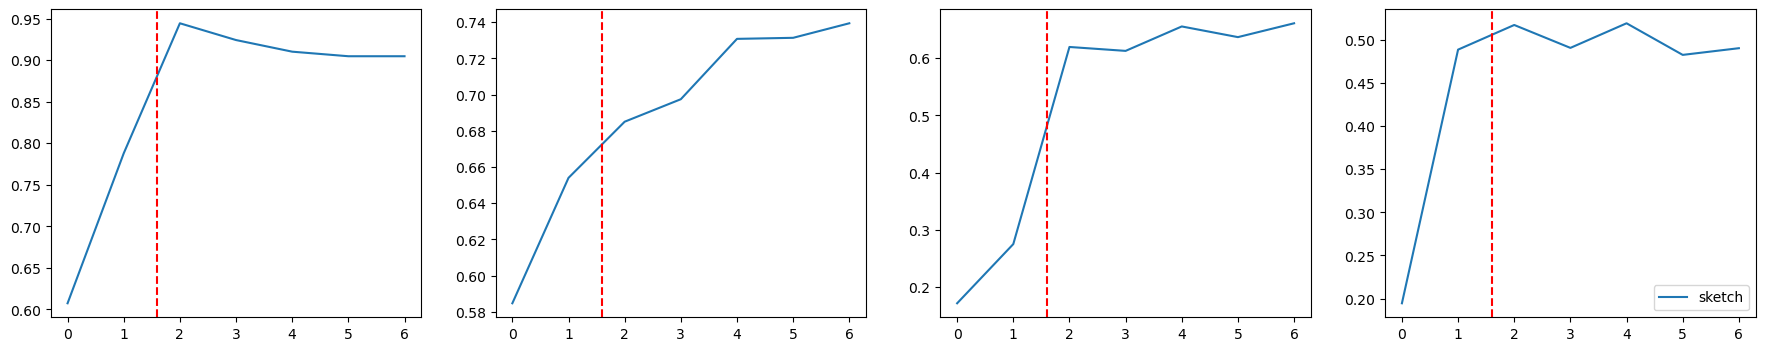

8
photo 0.976190476190476
art_painting 0.6696293902176255
cartoon 0.5988861041492619
sketch 0.5182072829131653


In [ ]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
plt.legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

### 训练集loss下降趋势

(8,
 array([5.28886955, 4.38322403, 4.01853641, 3.55174328, 3.05183437,
        2.37842223, 1.63410371, 1.40169107, 1.34998219, 1.28387012,
        1.22243458, 1.17971939, 1.13814693, 1.07974799, 1.06128474,
        0.9886737 , 0.9898708 , 0.94798859, 0.91024781, 0.91156757,
        0.89818378, 0.82926105, 0.84422584, 0.85205433, 0.80298228,
        0.81283612, 0.78568956, 0.81675587, 0.82061009, 0.80976308]))

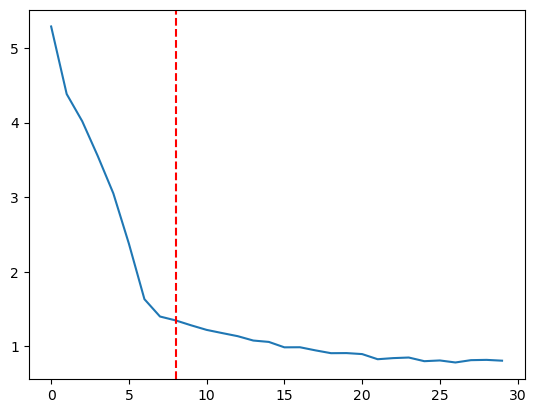

In [ ]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([0.77851636, 0.7950029 , 0.79878677, 0.78877648, 0.7618312 ,
       0.73489079, 0.72408812, 0.70009146, 0.68711336, 0.68627836,
       0.68025969, 0.66618612, 0.67135896, 0.66273319, 0.65621176,
       0.65939765, 0.65271131, 0.64991476, 0.65380472, 0.65664809,
       0.64600572, 0.6423661 , 0.63905388, 0.6542508 , 0.65006581,
       0.65333335, 0.64937336, 0.65594956, 0.65371575, 0.65010997])

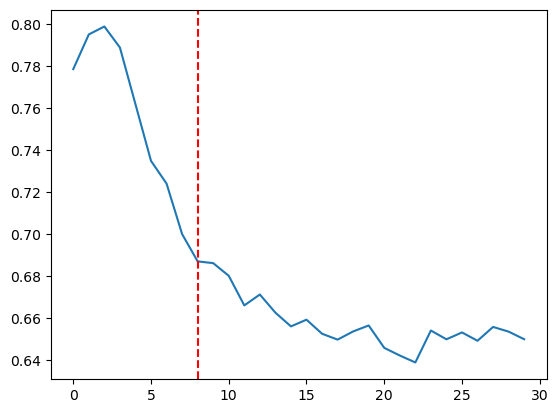

In [ ]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.78783525, 0.8467433 , 0.86206897, 0.87260536, 0.89128352,
       0.8960728 , 0.89463602, 0.89798851, 0.90373563, 0.90613027,
       0.90565134, 0.90804598, 0.90469349, 0.9085249 , 0.90469349,
       0.90277778, 0.90181992, 0.90565134, 0.89894636, 0.901341  ,
       0.90086207, 0.89798851, 0.89511494, 0.89894636, 0.89463602,
       0.89846743, 0.89559387, 0.89463602, 0.901341  , 0.89798851])

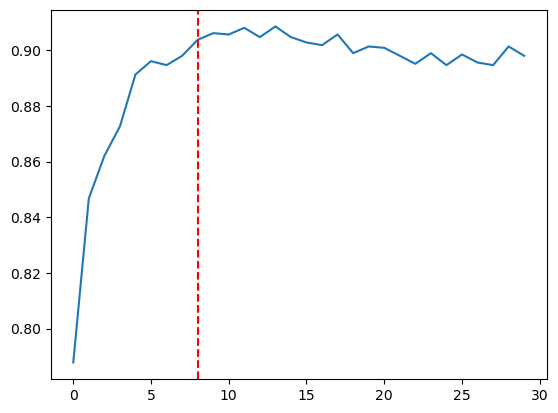

In [ ]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.55195503, 0.59795319, 0.66461697, 0.69549334, 0.74019183,
       0.7671488 , 0.76420324, 0.77485511, 0.79325512, 0.79168215,
       0.78685856, 0.78835646, 0.77345923, 0.78938238, 0.77830838,
       0.76820855, 0.77150642, 0.77271915, 0.75690335, 0.76373727,
       0.76195396, 0.75840131, 0.75677266, 0.75670228, 0.74794509,
       0.74801057, 0.75289669, 0.75252602, 0.75383617, 0.75577678])

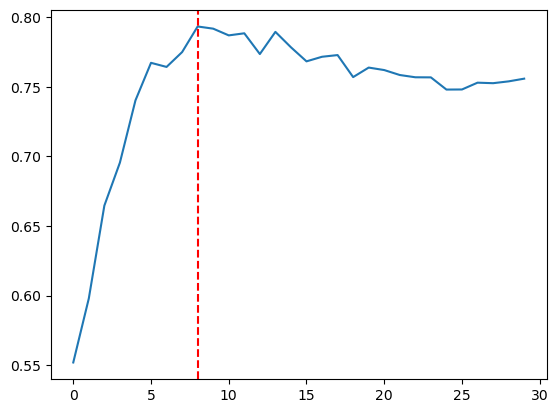

In [ ]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

[2.49689738 2.48719748 2.47044274 2.44278829 2.39911208 2.35177013
 2.30190792 2.25863276 2.22978688 2.20096257 2.16641097 2.12855469
 2.09213448 2.05655887 2.01947429 1.98726096 1.95306963 1.92320738
 1.89306868 1.87906294 1.8538812  1.83626109 1.82559207 1.81838395
 1.80249662 1.79696103 1.79666166 1.79411714 1.7874838  1.78935575]


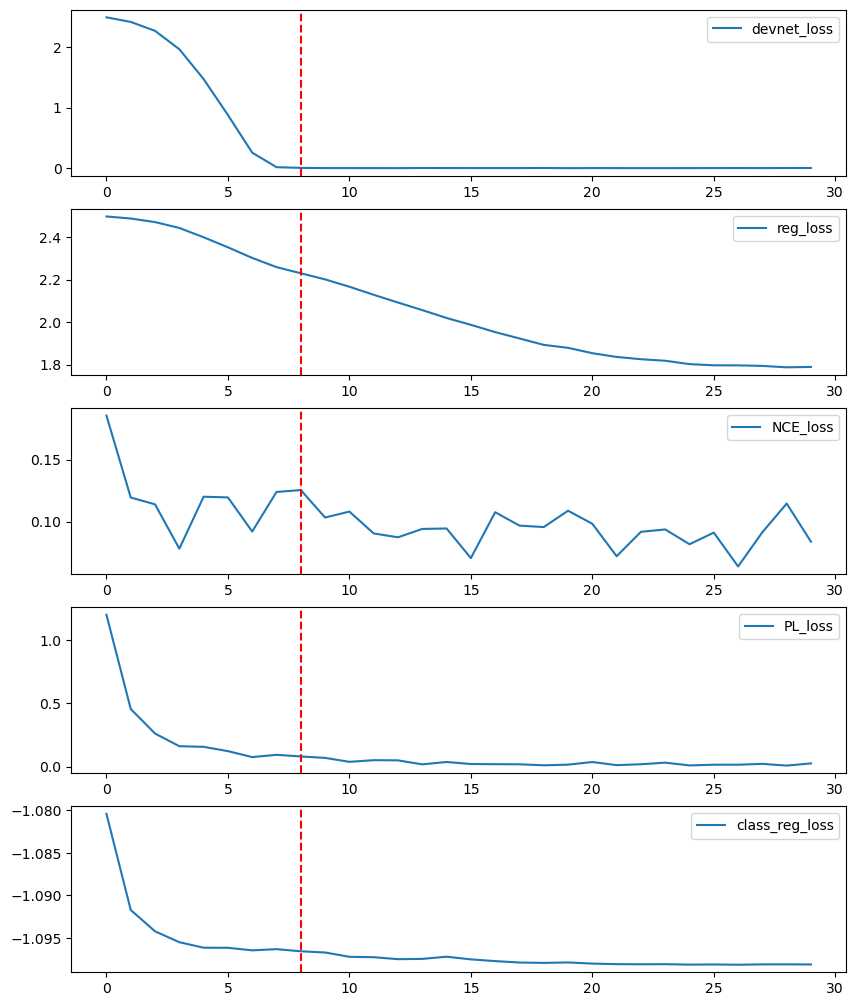

In [ ]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

In [ ]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [ ]:
# data["sub_train_results_loss"].mean(axis=1)

In [ ]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [ ]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 